# IF-1018 Minería de Datos 


- Versiones de librerías, python 3.9

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2
- scipy 1.8.0

In [1]:
# Importamos las bibliotecas necesarias
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Paso 1: Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Paso 2: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
# Paso 3: Crear y entrenar el modelo Naive Bayes
nb_model = GaussianNB() 
nb_model.fit(X_train, y_train)

# Paso 4: Realizar predicciones
y_pred = nb_model.predict(X_test)

In [4]:
# Paso 5: Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Precisión del modelo: {accuracy:.2f}")

Precisión del modelo: 0.98


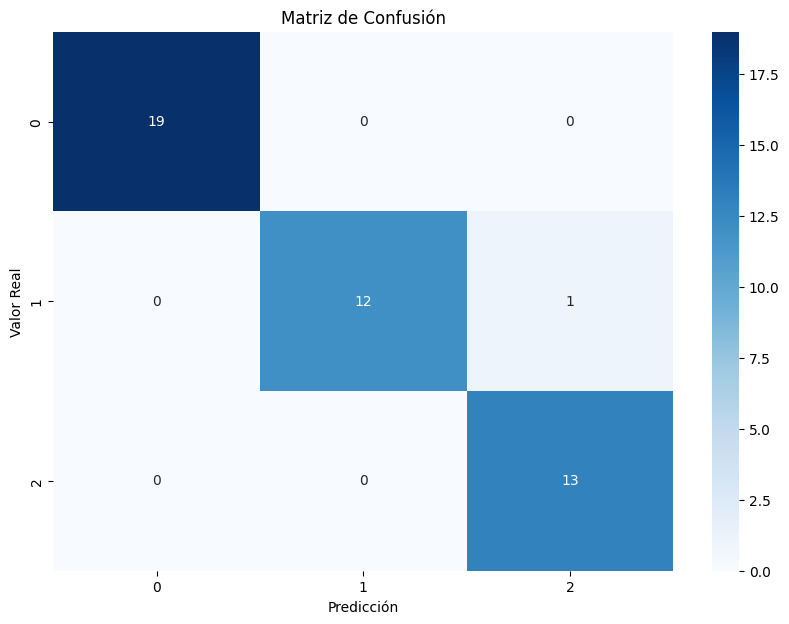

In [5]:
# Paso 6: Visualizar la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [6]:
# 1. Modificar el tamaño del conjunto de prueba y observar cómo afecta a la precisión del modelo.
# 2. Implementar una función para calcular manualmente las probabilidades previas de cada clase.
# 3. Crear una función para predecir la clase de una nueva flor dada sus medidas.
# 4. Comparar el rendimiento de Naive Bayes con otro clasificador (Árbol de Decisión).
# 5. Discutir las ventajas y desventajas de Naive Bayes basándose en los resultados obtenidos.


### Solucion

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
# Función para calcular probabilidades previas
def calcular_probabilidades_previas(y):
    clases, conteos = np.unique(y, return_counts=True)
    probabilidades = conteos / len(y)
    return dict(zip(clases, probabilidades))

# Función para predecir la clase de una nueva flor
def predecir_flor(modelo, medidas):
    return modelo.predict(medidas)[0]

# Función para entrenar y evaluar el modelo
def entrenar_evaluar_modelo(X_train, X_test, y_train, y_test, modelo):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, conf_matrix

# Función para visualizar la matriz de confusión
def visualizar_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(10,7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()


In [9]:

# 1. Modificar el tamaño del conjunto de prueba
tamanios_prueba = [0.2, 0.3, 0.4]
for test_size in tamanios_prueba:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    nb_model = GaussianNB()
    accuracy, _ = entrenar_evaluar_modelo(X_train, X_test, y_train, y_test, nb_model)
    print(f"Precisión con test_size={test_size}: {accuracy:.2f}")

# 2. Calcular manualmente las probabilidades previas
prob_previas = calcular_probabilidades_previas(y)
print("\nProbabilidades previas de cada clase:")
for clase, prob in prob_previas.items():
    print(f"Clase {clase}: {prob:.2f}")




Precisión con test_size=0.2: 1.00
Precisión con test_size=0.3: 0.98
Precisión con test_size=0.4: 0.97

Probabilidades previas de cada clase:
Clase 0: 0.33
Clase 1: 0.33
Clase 2: 0.33


In [13]:
# 3. Predecir la clase de una nueva flor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nueva_flor = np.array([[5.0, 3.6, 2.6, 0.2]]  )  # Medidas de una nueva flor
prediccion = predecir_flor(nb_model, nueva_flor)
print(f"\nLa flor predicha es: {iris.target_names[prediccion]}")



La flor predicha es: setosa



Precisión de Naive Bayes: 0.98
Precisión de Árbol de Decisión: 1.00


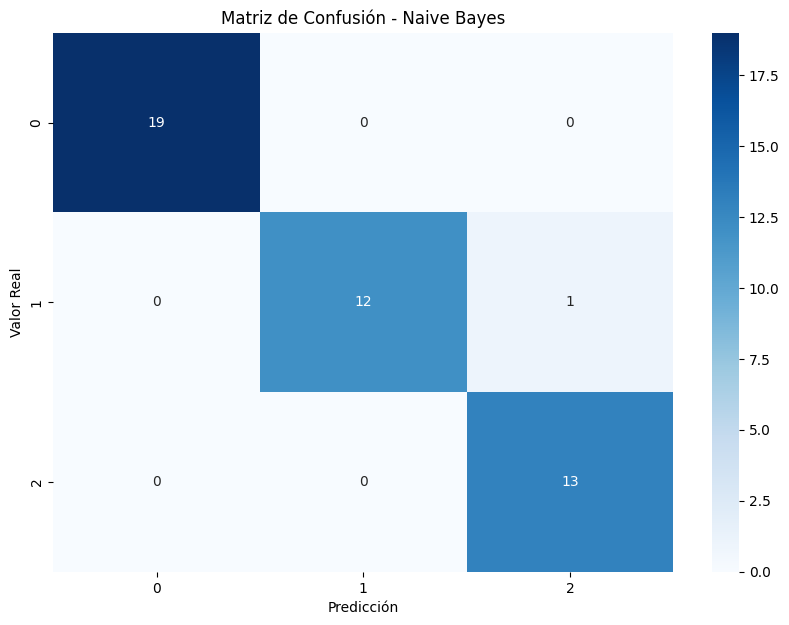

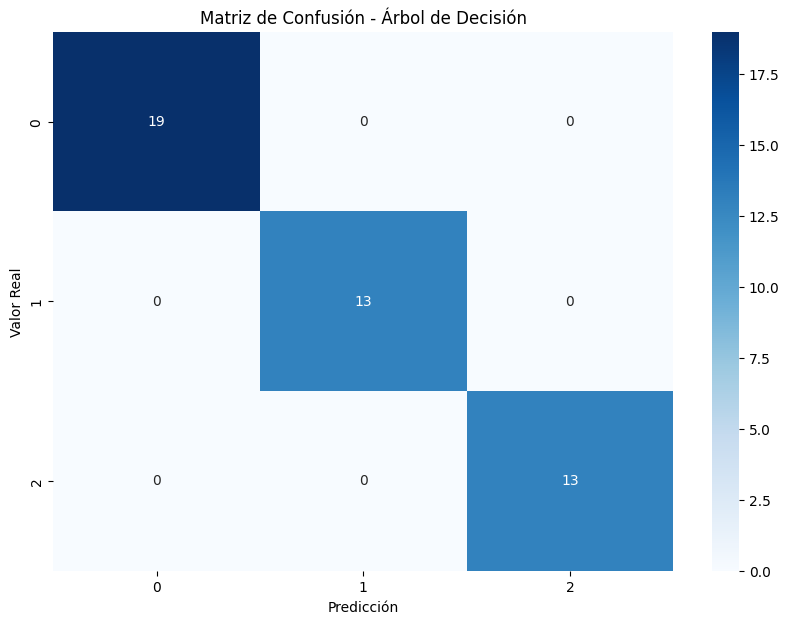

In [11]:
# 4. Comparar Naive Bayes con Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)

nb_accuracy, nb_conf_matrix = entrenar_evaluar_modelo(X_train, X_test, y_train, y_test, nb_model)
dt_accuracy, dt_conf_matrix = entrenar_evaluar_modelo(X_train, X_test, y_train, y_test, dt_model)

print(f"\nPrecisión de Naive Bayes: {nb_accuracy:.2f}")
print(f"Precisión de Árbol de Decisión: {dt_accuracy:.2f}")

visualizar_confusion_matrix(nb_conf_matrix, 'Matriz de Confusión - Naive Bayes')
visualizar_confusion_matrix(dt_conf_matrix, 'Matriz de Confusión - Árbol de Decisión')